<a href="https://colab.research.google.com/github/InfiniteCuriosity/An-Introduction-To-Statistical-Learning/blob/master/Copy_of_L03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, we'll train a decision tree classifier on diabetes data and visualize the decision tree with graphviz

In [ ]:
from sklearn import tree
import graphviz 

here we download the data from plotly

In [ ]:
!wget https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv

--2021-04-18 12:15:25--  https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23873 (23K) [text/plain]
Saving to: ‘diabetes.csv.1’

diabetes.csv.1      100%[===================>]  23.31K  --.-KB/s    in 0.002s  

2021-04-18 12:15:26 (9.86 MB/s) - ‘diabetes.csv.1’ saved [23873/23873]



Next, we'll manually process the data from its comma separated value (csv) format

In [ ]:
with open("diabetes.csv", "r") as f:
    data = f.readlines()
feats = data[0]
feats = feats.replace('\n','')
feats = feats.split(",")

Let's print the columns in the dataset

In [ ]:
print(feats)
print(data)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
['Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome\n', '6,148,72,35,0,33.6,0.627,50,1\n', '1,85,66,29,0,26.6,0.351,31,0\n', '8,183,64,0,0,23.3,0.672,32,1\n', '1,89,66,23,94,28.1,0.167,21,0\n', '0,137,40,35,168,43.1,2.288,33,1\n', '5,116,74,0,0,25.6,0.201,30,0\n', '3,78,50,32,88,31,0.248,26,1\n', '10,115,0,0,0,35.3,0.134,29,0\n', '2,197,70,45,543,30.5,0.158,53,1\n', '8,125,96,0,0,0,0.232,54,1\n', '4,110,92,0,0,37.6,0.191,30,0\n', '10,168,74,0,0,38,0.537,34,1\n', '10,139,80,0,0,27.1,1.441,57,0\n', '1,189,60,23,846,30.1,0.398,59,1\n', '5,166,72,19,175,25.8,0.587,51,1\n', '7,100,0,0,0,30,0.484,32,1\n', '0,118,84,47,230,45.8,0.551,31,1\n', '7,107,74,0,0,29.6,0.254,31,1\n', '1,103,30,38,83,43.3,0.183,33,0\n', '1,115,70,30,96,34.6,0.529,32,1\n', '3,126,88,41,235,39.3,0.704,27,0\n', '8,99,84,0,0,35.4,0.388,50,0\n', '7,196,9

We now load the data into a list, `dat` and create a variable `labs` containing the label for a positive or negative example of diabetes

In [ ]:
feats = feats[0:(len(feats)-1)]	
dat = []				
labs = []			
for i in range(1,len(data)):	
     line = data[i]		
     line = line.replace('\n','')		
     csvline = line.split(",")		
     labs = labs + [int(csvline[len(csvline)-1])]
     csvline = [float(csvline[i]) for i in range(len(csvline)-1)]
     dat = dat + [csvline]		

Let's find out how many examples we have

In [ ]:
print(len(dat))
print(dat[0:5])
print(labs[0:5])

768
[[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0], [1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0], [8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0], [1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0], [0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0]]
[1, 0, 1, 0, 1]


We can also examine an example row in the data, row 15

In [ ]:
print(dat[15])

[7.0, 100.0, 0.0, 0.0, 0.0, 30.0, 0.484, 32.0]


Using scikit-learn, a machine learning library in Python, we'll train a decision tree 3 decision rules and fit it to our data and labels

In [ ]:

clf = tree.DecisionTreeClassifier(max_leaf_nodes = 7)	
clf = clf.fit(dat, labs)			

We can calculate the accuracy of this model

In [ ]:
correct = 0						
for i in range(len(dat)):	
    if clf.predict([dat[i]]) == labs[i]: correct = correct + 1
100.0* correct / len(dat)

77.21354166666667

Finally, we'll visualze our decision tree

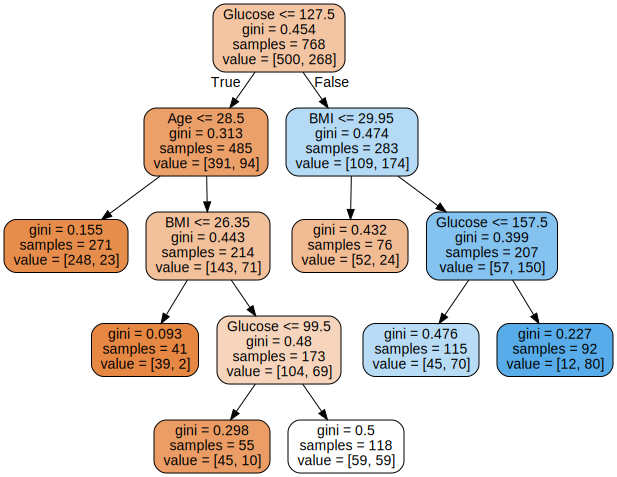

In [ ]:
dot_data = tree.export_graphviz(clf, feature_names=feats,
                      filled=True, rounded=True) 
graph = graphviz.Source(dot_data)	
graph	